# Project : Webscraping
## By : Kishan Prajapati

In [2]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

## Gathering Data from a single page

In [4]:
# Using the home page to do the webscraping once
url='https://www.mangakakalot.gg'
# getting the response and statuscode, for this webscite it status is 200
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")

## Getting the links from the table for the top 10 Popular manga

In [6]:
''' 
now i am using a list to gather the links provided within a table on the webscite for the top 10 trending of all time
'''
url_list = []
comic = soup.find(class_='xem-nhieu')
for row in comic.find_all(class_='xem-nhieu-item'):
    url=row.h3.a['href']
    url_list.append(url)

## The variables that were collected were : Title, Author, Status, Last-Updates, Views, Genre, and Rating

In [8]:
# gathering data from each url collected above.
page_data = []
for link in url_list :
    p1 = link
    response = requests.get(p1)
    page = response.text
    soup = bs(page)

    info_table = soup.find(class_="manga-info-text")

    title = info_table.contents[1].h1.text # gets you the name of the manga
    author = info_table.contents[3].a.text.strip() # gets you the name of the author
    status = info_table.contents[5].text.split(':')[1].split() # reveals the status
    last_updated = info_table.contents[7].text.split(':')[1].split()[0] # info about when was it last updated
    views = info_table.contents[11].text.split(':')[1].split()[0] # how many total views does the manga have
    gn = [] # creating a list for genres and getting them
    for generes in info_table.contents[13].find_all('a'):
        gn.append(generes.text.strip())
    rating = info_table.contents[17].text.split(':')[1].split()[0]
# now i created a dictionary to gather all those information in one place so that i can treat the whole data as a row in a dataframe
    my_page = {
    "Title": title,
    "Author": author,
    "Status": status,
    "Last Updated": last_updated,
    "Views": views,
    "Genre": gn,
    "Rating": rating,
                        }
    page_data.append(my_page)

In [9]:
# Here I converted the dictionary into a dataframe
Top_ten = pd.DataFrame(page_data)
Top_ten

,Title,Author,Status,Last Updated,Views,Genre,Rating
0,Martial Peak,Momo (Ii),[Ongoing],Apr-02-2025,"726,649,636","[Action, Adventure, Fantasy, Historical, Marti...",5
1,Tales Of Demons And Gods,Mad Snail,[Ongoing],Apr-22-2025,"554,614,592","[Action, Adventure, Comedy, Drama, Fantasy, Ha...",5
2,Solo Leveling,Sung-Lak Jang,[Ongoing],Jan-09-2025,"508,960,254","[Action, Adventure, Fantasy, Shounen, Webtoons]",4.75
3,Versatile Mage,Chaos,[Ongoing],Nov-02-2024,"253,083,599","[Action, Adventure, Drama, Fantasy, Martial ar...",4.68
4,Apotheosis,Ranzai Studio,[Ongoing],Apr-02-2025,"249,006,817","[Action, Fantasy, Martial arts, Shounen]",5
5,One Piece,Oda Eiichiro,[Ongoing],Apr-26-2025,"225,664,498","[Action, Adventure, Comedy, Drama, Fantasy, Sh...",5
6,The Beginning After The End,Turtleme,[Ongoing],Apr-24-2025,"223,988,835","[Action, Adventure, Comedy, Fantasy, Webtoons]",5
7,Kimetsu No Yaiba,Gotouge Koyoharu,[Ongoing],Oct-31-2024,"210,004,597","[Adventure, Fantasy, Historical, Shounen]",4.63
8,Star Martial God Technique,Mad Snail,[Ongoing],Apr-29-2025,"193,856,935","[Action, Adventure, Drama, Fantasy, Harem, Man...",5
9,Rebirth Of The Urban Immortal Cultivator,Daxingdao Anime,[Ongoing],Apr-25-2025,"193,262,163","[Action, Adventure, Fantasy, Martial arts, Sei...",5


In [10]:
gn = Top_ten['Genre'].tolist() # creatiing one big list from multliple lists

## Graphing the Obtained data

## Question 1 : Which are the top Genres that are all time trending?

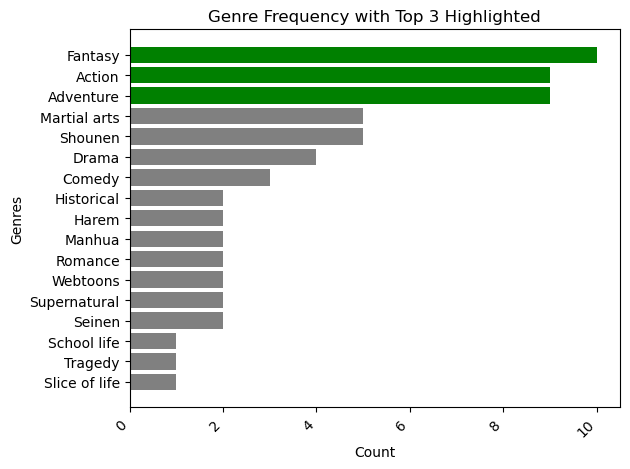

In [13]:
# Flattening the list of lists
flattened = [genre for sublist in gn for genre in sublist]
# Counting frequency of genres
genre_counts = Counter(flattened)
# Sorting genres by frequency in descending order
sorted_genres = genre_counts.most_common()
# Preparing data for plotting
genres = [item[0] for item in sorted_genres]
counts = [item[1] for item in sorted_genres]
# Defining colors: top 3 genres in green, others in another color (e.g., blue)
colors = ['green' if i < 3 else 'grey' for i in range(len(genres))]

# Creating the bar plot
plt.barh(genres, counts, color=colors)
plt.xticks(rotation=45, ha="right")
plt.title("Genre Frequency with Top 3 Highlighted")
plt.xlabel("Count")
plt.ylabel("Genres")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#### The above graph shows the top 3 Trending Genres for manga that has benn an all time trending

### Gathering Data from multiple pages at once

In [16]:
url=['https://www.mangakakalot.gg/manga-list/new-manga',
     'https://www.mangakakalot.gg/manga-list/hot-manga',
     'https://www.mangakakalot.gg/manga-list/completed-manga',
     'https://www.mangakakalot.gg/manga-list/latest-manga'    ]

In [17]:
soup = []
for link in url :
    resp = requests.get(link)
    status = resp.status_code
    if status == 200:
        page = resp.text
        soup.append(bs(page))
    else:
        print(f"Oops! Received status code {status}")

In [18]:
comic_links = []

In [19]:
url_list = []
for soups in soup : 
    comic = soups.find(class_='truyen-list')
    for row in comic.find_all(class_='list-truyen-item-wrap'):
        url_A=row.h3.a['href']
        url_list.append(url_A)

In [20]:
len(url_list) # shows how many manga infromation will be collected

96

In [21]:
# The start of gathering Data, would be same for all 4 links
data_frame = []
for link in url_list :
    p1 = link
    response = requests.get(p1)
    page = response.text
    soup = bs(page)
    info_table = soup.find(class_="manga-info-text")
    title = info_table.contents[1].h1.text
    author = []
    for names in info_table.contents[3].find_all('a'):
        author.append(names.text.strip())
  
    status = info_table.contents[5].text.split(':')[1].split()
    last_updated = info_table.contents[7].text.split(':')[1].split()[0]
    views = info_table.contents[11].text.split(':')[1].split()[0]
    v1=int(views.replace(',', ''))
    gn = []
    for generes in info_table.contents[13].find_all('a'):
        gn.append(generes.text.strip())
    rating = float(info_table.contents[17].text.split(':')[1].split()[0])
# saving the scrapped data into a dictionary
    my_page = {
    "Title": title,
    "Author": author,
    "Status": status,
    "Last Updated": last_updated,
    "Views": v1,
    "Genre": gn,
    "Rating": rating,
                        }
    data_frame.append(my_page)

In [22]:
# converting the dictionary into an dataframe
manga = pd.DataFrame(data_frame)

In [23]:
manga # the collected data

,Title,Author,Status,Last Updated,Views,Genre,Rating
0,"Damn, those are huge! The tall, big-breasted b...",[Horie Ryuu(Story&Art) / Shino(Story&Art) / Ik...,[Ongoing],Apr-29-2025,677,"[Anthology, Comedy, Ecchi, Gyaru, Manga, Roman...",5.00
1,"You Weren't My Sister, but My Fiancé!?","[Miraijin A, Yunyanko]",[Releasing],Apr-29-2025,150,"[Comedy, Romance, School, Slice of life]",4.12
2,Kasenjiki RomiJuri Kousou Kyoku,[Tobi Washio],[Completed],Apr-29-2025,279,"[School life, Yaoi]",5.00
3,Doctor's Time Travel to Joseon,[Buffering / Lim Dong Gyu(Art)],[Ongoing],Apr-29-2025,273,"[Comedy, Drama, Fantasy, full_color, Historica...",5.00
4,The Night I Spend With the Mastermind Prince I...,[Tsuruko.],[Releasing],Apr-29-2025,290,"[Fantasy, Josei, Romance]",4.50
...,...,...,...,...,...,...,...
91,All My Alter Egos Are Tycoons,[Unknown],[Ongoing],Apr-29-2025,643,"[Action, Adventure, Fantasy]",5.00
92,Hello! Veterinarian!,"[Mi Yeok-guk (nini), Seo Geon-joo]",[Ongoing],Apr-29-2025,404,"[Drama, Shounen, Slice of life, Webtoons]",5.00
93,Kowamote no Rinjin ga Ω datta Toki no Taishohou,[Nikuya Inui],[Ongoing],Apr-29-2025,342,"[Romance, Yaoi]",5.00
94,The God of War is Leveling Up,[Unknown],[Ongoing],Apr-29-2025,495,"[Action, Magic, Manhwa]",5.00


In [24]:
manga.dtypes # checking the datatpes

Title            object
Author           object
Status           object
Last Updated     object
Views             int64
Genre            object
Rating          float64
dtype: object

In [25]:
gn1 = manga['Genre'].tolist()

## A graphical representation of Genre count based on diffrent mangas

## Question 2 : Which Genre of manga are most common? 

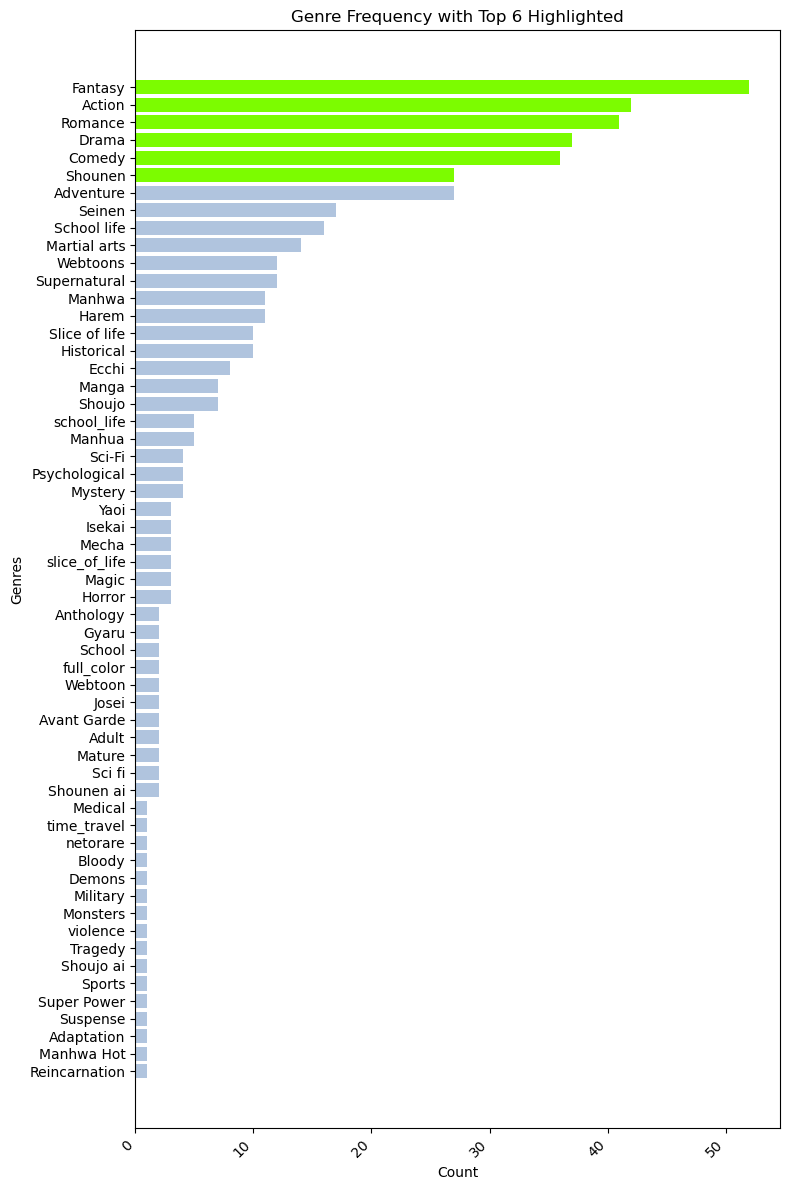

In [28]:
# Flattening the list of lists
flattened = [genre for sublist in gn1 for genre in sublist]
# Counting frequency of genres
genre_counts = Counter(flattened)
# Sorting genres by frequency in descending order
sorted_genres = genre_counts.most_common()
# Preparing data for plotting
genres = [item[0] for item in sorted_genres]
counts = [item[1] for item in sorted_genres]
# Defining colors: top 6 genres in green, others in another color (e.g., blue)
colors = ['lawngreen' if i < 6 else 'lightsteelblue' for i in range(len(genres))]

# Creating the bar plot
plt.figure(figsize=(8, 12))
plt.barh(genres, counts, color=colors)
plt.xticks(rotation=45, ha="right")
plt.title("Genre Frequency with Top 6 Highlighted")
plt.xlabel("Count")
plt.ylabel("Genres")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Question 3 : which type of Manga have most Views?

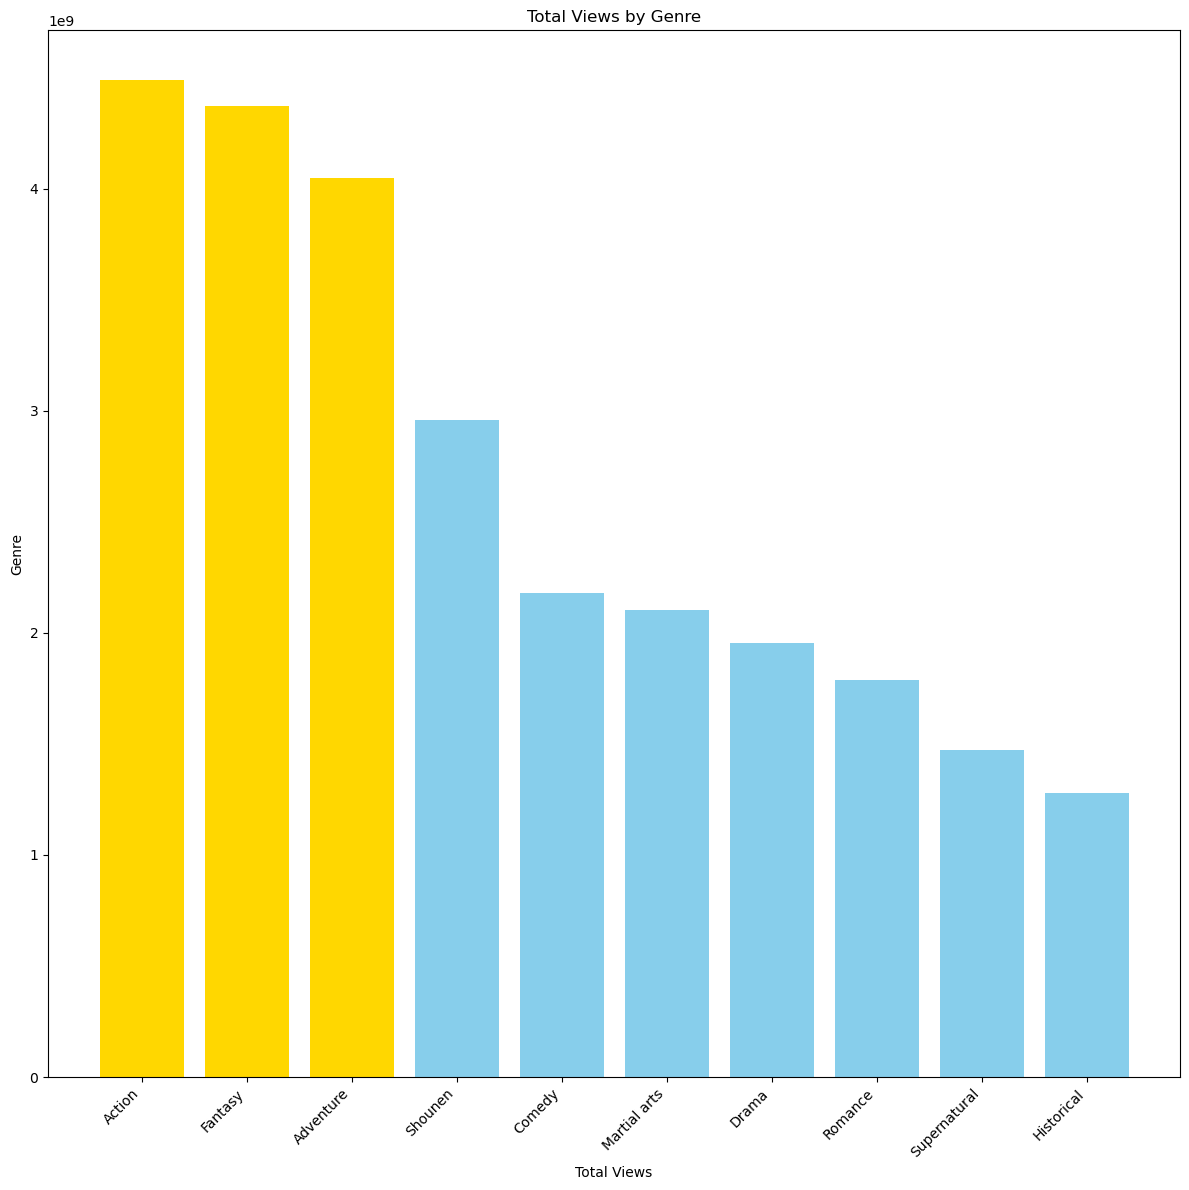

In [30]:
# Genre vs Views
data = manga

# Explode the genres column
data = data.explode('Genre')

# Aggregate integer values by genre
agg_data = data.groupby('Genre')['Views'].sum().reset_index()

# Sort by Values
sort_data = agg_data.sort_values(by='Views', ascending=False)
sorted_data = sort_data.head(10)

top_3_genres = sorted_data.head(3)  # Top 3 rows based on sorted data
colors = ['gold' if genre in top_3_genres['Genre'].values else 'skyblue' for genre in sorted_data['Genre']]

plt.figure(figsize=(12, 12))
plt.bar(sorted_data['Genre'], sorted_data['Views'], color=colors)
plt.xlabel('Total Views')
plt.ylabel('Genre')
plt.title('Total Views by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


## Question 4 : Which genre has the highest Rating?

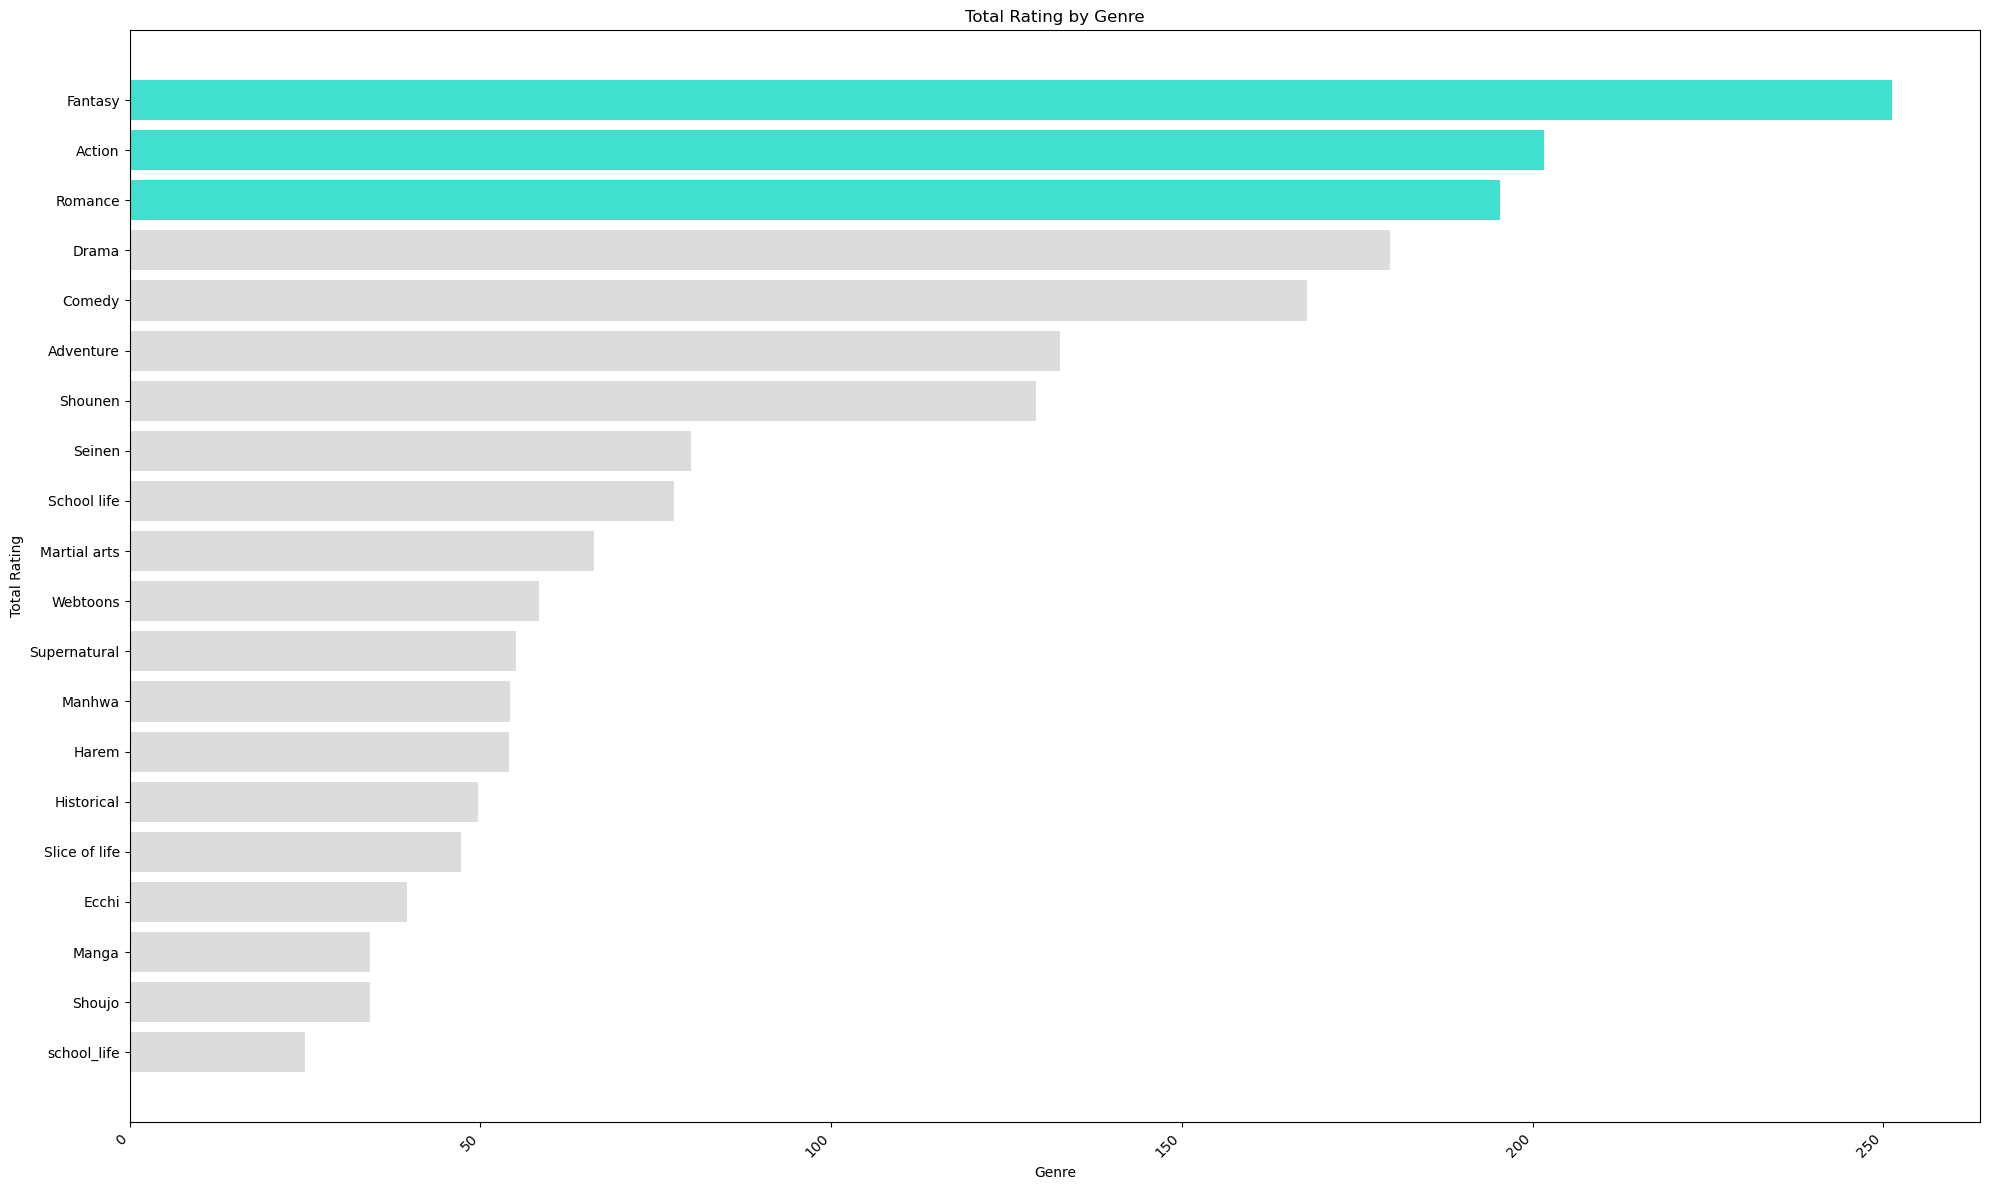

In [32]:
# Genre vs Ratings
data = manga

# Explode the genres column
data = data.explode('Genre')

# Aggregate integer values by genre
agg_data = data.groupby('Genre')['Rating'].sum().reset_index()

# Sort by Values
sorted_data = agg_data.sort_values(by='Rating')
Top_20_data = sorted_data.tail(20)

# Color the Top 3 values
top_3_genres = Top_20_data.tail(3)  # Top 3 rows based on sorted data
colors = ['turquoise' if genre in top_3_genres['Genre'].values else 'gainsboro' for genre in Top_20_data['Genre']]

# Plot the graph
plt.figure(figsize=(20, 12))
plt.barh(Top_20_data['Genre'], Top_20_data['Rating'], color=colors)
plt.xlabel('Genre')
plt.ylabel('Total Rating')
plt.title('Total Rating by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [33]:
Top_20_data

,Genre,Rating
53,school_life,25.00
38,Shoujo,34.30
19,Manga,34.30
10,Ecchi,39.50
42,Slice of life,47.32
14,Historical,49.63
13,Harem,54.10
21,Manhwa,54.30
45,Supernatural,55.06
49,Webtoons,58.39
